## Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from hurricaneModels import HurricaneModel

In [2]:
atl = pd.read_csv('atl_preproc.csv')
east = pd.read_csv('eastern_preproc.csv')
central = pd.read_csv('central_preproc.csv')

In [3]:
def numPointsPerHurricane(df, n):
    groups = df.groupby(['SID']).size()
    groups = groups.to_dict()
    data_list = []
    
    for keys in groups.keys():
        if groups[keys] >= n:
            #print(keys)
            data_list.append(df[df['SID'] == keys])

    return data_list

In [4]:
l1 = numPointsPerHurricane(atl, 95)
l2 = numPointsPerHurricane(east, 90)
l3 = numPointsPerHurricane(central, 65) 

In [5]:
data_list = l1 + l2 + l3

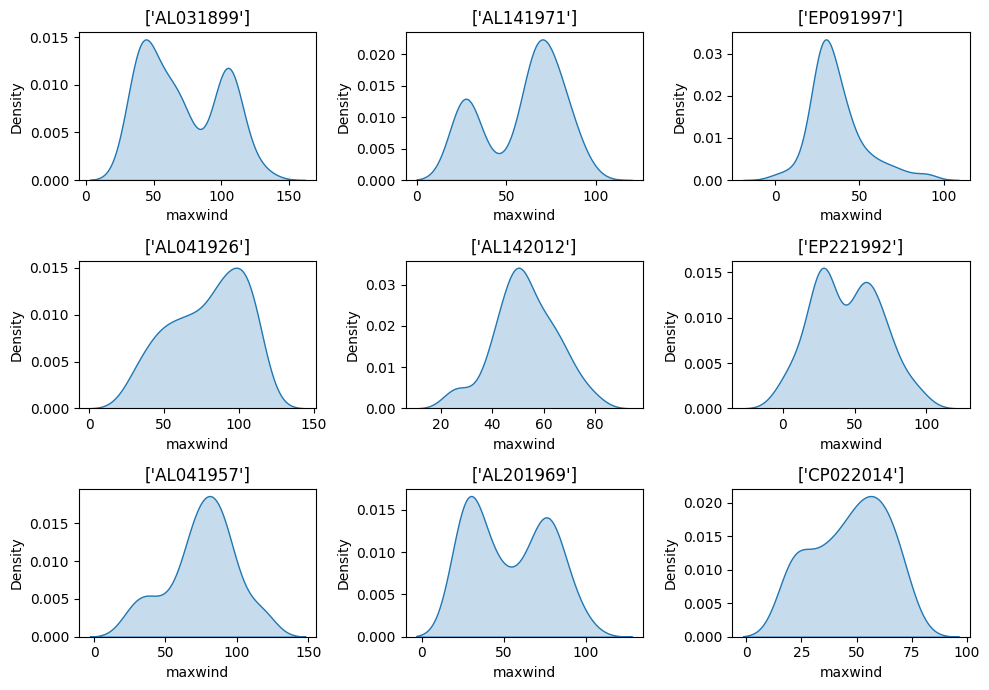

In [6]:
fig, axs = plt.subplots(3,3, figsize = [10,7])
k = 0

for i in range(0, 3):
    for j in range(0, 3):
        axs[j, i].set_title(pd.unique(data_list[k]['SID']))
        sns.kdeplot(x = data_list[k]['maxwind'], 
                        fill = True, 
                        ax = axs[j, i])
        k += 1
plt.tight_layout()

['AL031899'] MSE: 91.94538935566925 MAE: 8.512697060902914
['AL041926'] MSE: 569.8298163262612 MAE: 18.612857709612165
['AL041957'] MSE: 181.84591245225164 MAE: 9.258892386300223
['AL141971'] MSE: 1527.8619613663868 MAE: 29.594712368277616
['AL142012'] MSE: 274.44487774718476 MAE: 13.808111463274274
['AL201969'] MSE: 478.83445767847866 MAE: 18.34838252597385
['EP091997'] MSE: 206.12779095724292 MAE: 11.769200907813179
['EP221992'] MSE: 2664.055310642452 MAE: 47.91192224290636
['CP022014'] MSE: 169.44283618605246 MAE: 10.909858226776123


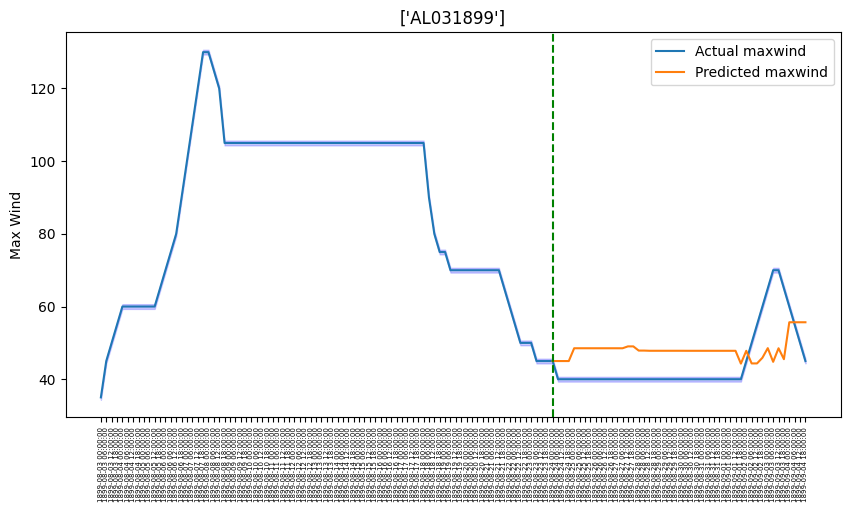

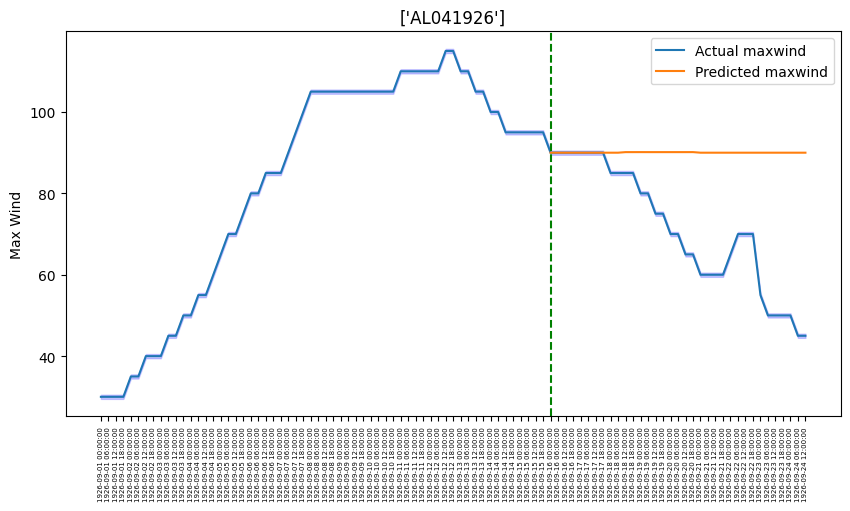

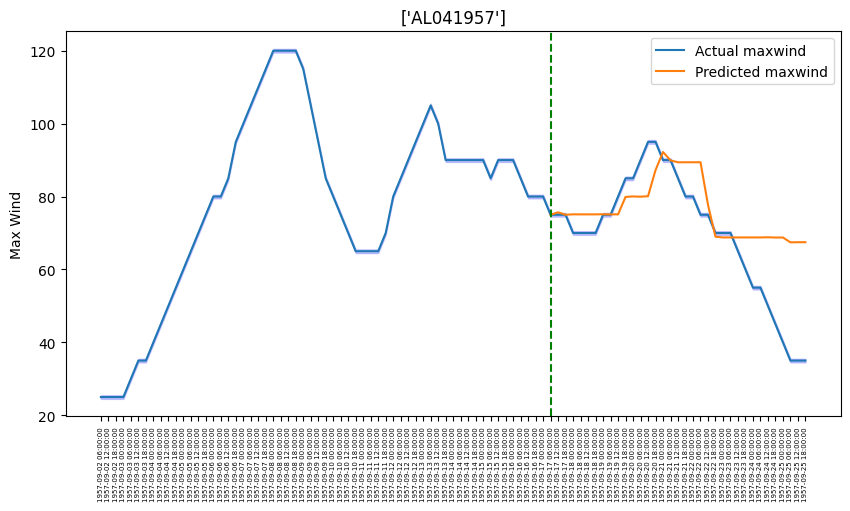

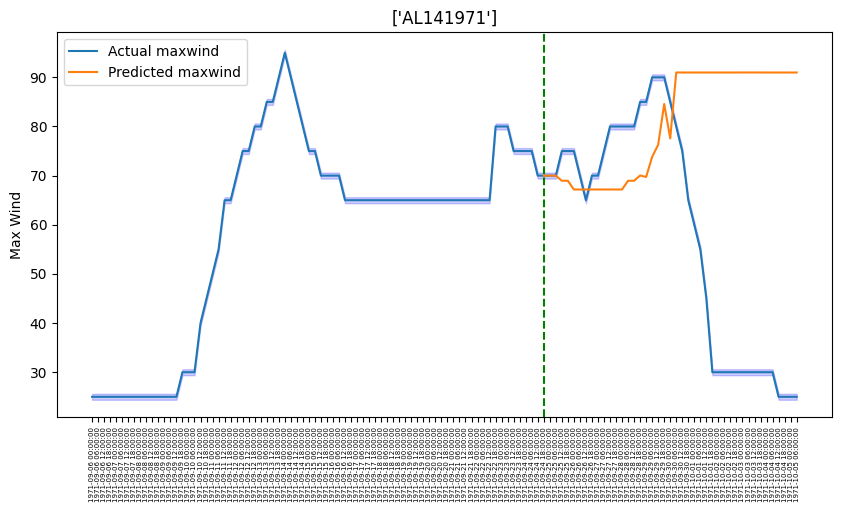

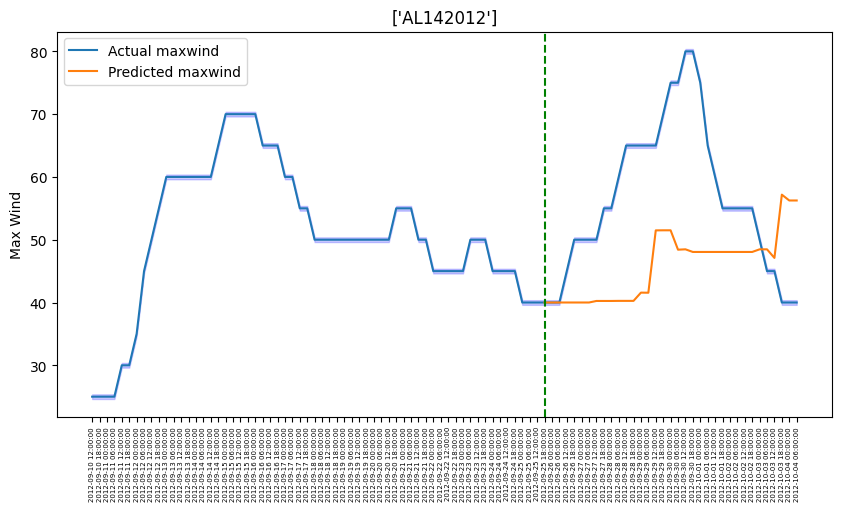

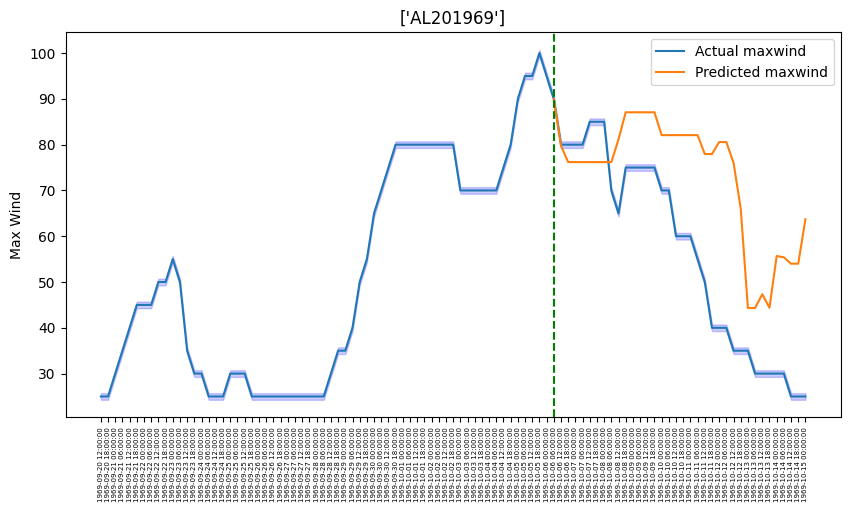

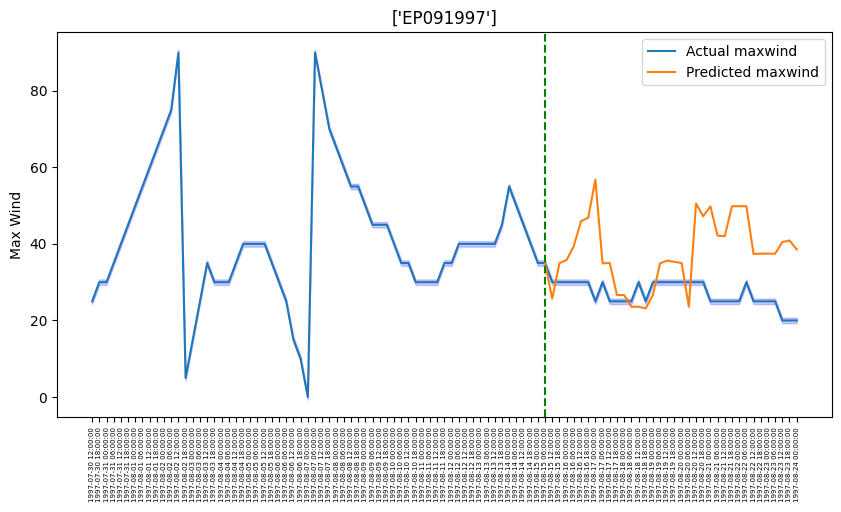

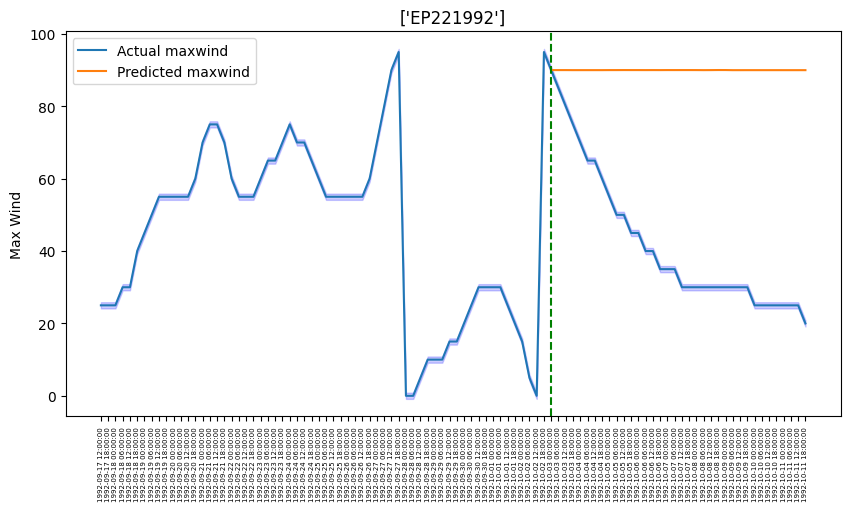

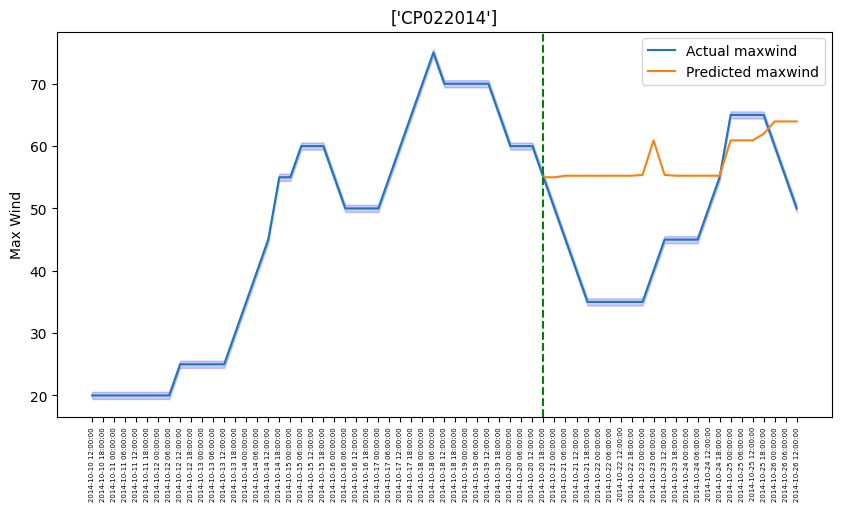

In [7]:
feats = ['lat', 'long', 'dtl', 'distance', 'cum_distance']
target = 'maxwind'
ratio = 0.65

model1 = xgb.XGBRegressor(n_estimators = 100)
model2 = svm.SVR(kernel = 'linear')

for data in data_list:
    Hmodel = HurricaneModel(model1, data)
    Hmodel.split_train_predict(ratio, feats, target, True)